# what is factor analysis?

Factor Analysis (FA) is a statistical technique used to identify latent variables or factors that explain the observed correlations among multiple variables. 

- Mostly used during eda
- also can be used as dimentionality reduction approach

How doest it compare with PCA?

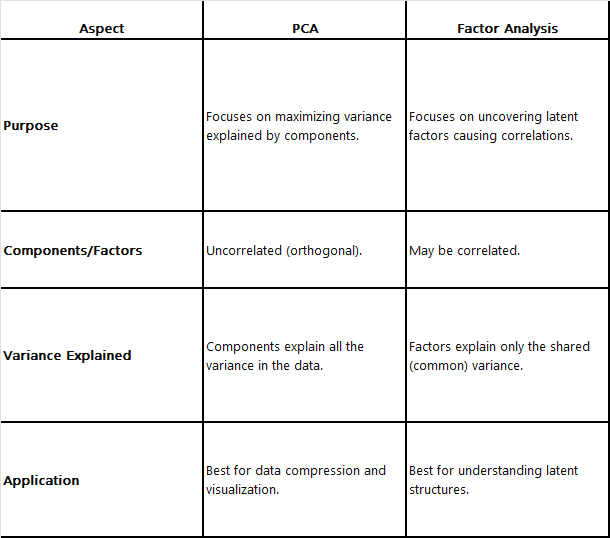


In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 100
age = np.random.randint(25, 60, size=n_samples)  # Age between 25 and 60
salary = np.random.normal(loc=70000, scale=10000, size=n_samples)  # Salary with mean 70k
savings = salary * 0.3 + np.random.normal(scale=5000, size=n_samples)  # Savings depend on salary
expenses = age * 100 + np.random.normal(scale=1000, size=n_samples)  # Expenses increase with age

# Create a DataFrame
data = pd.DataFrame({
    "Salary": salary,
    "Age": age,
    "Savings": savings,
    "Expenses": expenses
})

# Standardize the data (important for FA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform Factor Analysis
n_factors = 2  # Number of latent factors to extract
fa = FactorAnalysis(n_components=n_factors, random_state=42)
factors = fa.fit_transform(data_scaled)

# Create DataFrame for Factor Loadings
factor_loadings = pd.DataFrame(fa.components_.T, 
                               index=data.columns, 
                               columns=[f'Factor{i+1}' for i in range(n_factors)])

# Output
print("Dataset (first 5 rows):")
print(data.head())

print("\nFactor Loadings:")
print(factor_loadings)

# Factors for each individual
print("\nFactor Scores for Individuals (first 5 rows):")
factor_scores = pd.DataFrame(factors, columns=[f'Factor{i+1}' for i in range(n_factors)])
print(factor_scores.head())


Dataset (first 5 rows):
          Salary  Age       Savings     Expenses
0   84954.342529   53  29336.189558  6843.067652
1   73381.812520   39  28356.491368  5223.263807
2  103722.962536   32  33239.319981  3071.587853
3   60796.091949   45  22941.505510  4034.335229
4   66013.616100   43  15465.879380  4358.508902

Factor Loadings:
           Factor1   Factor2
Salary    0.340808  0.605329
Age       0.874719 -0.067362
Savings   0.168234  0.650271
Expenses  0.880060 -0.085369

Factor Scores for Individuals (first 5 rows):
    Factor1   Factor2
0  1.492074  0.915604
1  0.223162  0.608149
2 -0.513728  2.750294
3 -0.033493 -0.386333
4 -0.025464 -0.773869


 - Factor1: Represents "Wealth" (correlated with Salary and Savings).

 - Factor2: Represents "Lifestyle" (correlated with Age and Expenses).


 Thus Factor analysis helps to understand correlation as well as apply latent feature extraction